In [1]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}')

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df
    
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Sex','Cabin','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [5]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=11)

In [6]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


In [7]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [10]:
pred_proba = lr_clf.predict_proba(X_test)

In [11]:
np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)

array([[0.44935225, 0.55064775, 1.        ],
       [0.86335511, 0.13664489, 0.        ],
       [0.86429643, 0.13570357, 0.        ],
       [0.84968519, 0.15031481, 0.        ],
       [0.82343409, 0.17656591, 0.        ],
       [0.84231224, 0.15768776, 0.        ],
       [0.87095489, 0.12904511, 0.        ],
       [0.27228603, 0.72771397, 1.        ],
       [0.78185128, 0.21814872, 0.        ],
       [0.33185998, 0.66814002, 1.        ],
       [0.86178763, 0.13821237, 0.        ],
       [0.87058097, 0.12941903, 0.        ],
       [0.8642595 , 0.1357405 , 0.        ],
       [0.87065944, 0.12934056, 0.        ],
       [0.56033544, 0.43966456, 0.        ],
       [0.85003022, 0.14996978, 0.        ],
       [0.88954172, 0.11045828, 0.        ],
       [0.74250732, 0.25749268, 0.        ],
       [0.71120224, 0.28879776, 0.        ],
       [0.23776278, 0.76223722, 1.        ],
       [0.75684107, 0.24315893, 0.        ],
       [0.62428169, 0.37571831, 0.        ],
       [0.

In [12]:
from sklearn.preprocessing import Binarizer

In [13]:
X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]
X

[[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]

In [14]:
binarizer = Binarizer(threshold=1.1)

In [15]:
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [16]:
custom_threshold=0.5

In [20]:
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

In [21]:
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)

In [22]:
# 오차행렬
# [[108  10]
#  [ 14  47]]
# 정확도:0.8659, 정밀도:0.8246, 재현율:0.7705
get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


In [23]:
custom_threshold=0.4
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197


In [24]:
custom_threshold=0.6
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213


In [25]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_1,thresholds):
    for custom_threshold in thresholds:
        custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
        get_clf_eval(y_test,custom_predict)
get_eval_by_threshold(y_test,pred_proba_1,thresholds)        

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213


In [26]:
from sklearn.metrics import precision_recall_curve

In [28]:
precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_1)

In [29]:
precisions.shape,recalls.shape,thresholds.shape

((148,), (148,), (147,))

In [30]:
thr_index = np.arange(0,thresholds.shape[0],15)

In [31]:
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [33]:
np.round(thresholds[thr_index],2)

array([0.12, 0.13, 0.15, 0.17, 0.26, 0.38, 0.49, 0.63, 0.76, 0.9 ])

In [34]:
np.round(precisions[thr_index] ,3)

array([0.379, 0.424, 0.455, 0.519, 0.618, 0.676, 0.797, 0.93 , 0.964,
       1.   ])

In [35]:
np.round(recalls[thr_index] ,3)

array([1.   , 0.967, 0.902, 0.902, 0.902, 0.82 , 0.77 , 0.656, 0.443,
       0.213])

In [36]:
import matplotlib.pyplot as plt

In [41]:
def precision_recall_curve_plot(y_test,pred_proba_1):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()   

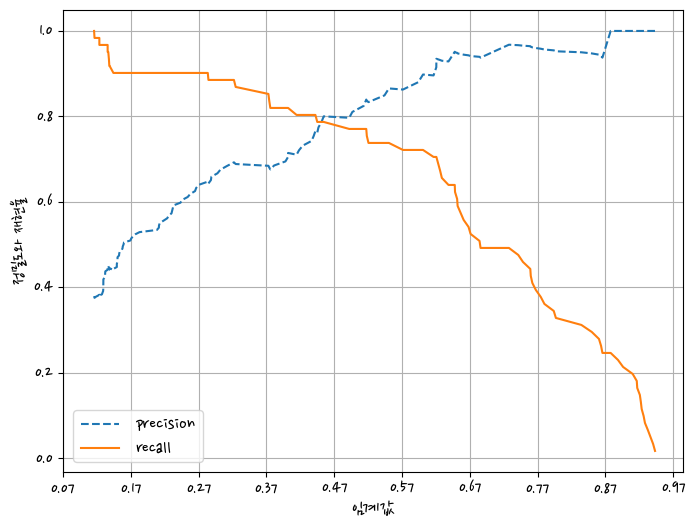

In [42]:
precision_recall_curve_plot(y_test,pred_proba_1)

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_test,pred)

0.7966101694915254

In [46]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}')
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_1,thresholds):
    for custom_threshold in thresholds:
        custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
        print(f'임계값:{custom_threshold}')
        get_clf_eval(y_test,custom_predict)
get_eval_by_threshold(y_test,pred_proba_1,thresholds)        

임계값:0.4
오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197, F1:0.7576
임계값:0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869, F1:0.7869
임계값:0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705, F1:0.7966
임계값:0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377, F1:0.7965
임계값:0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213, F1:0.8000


In [47]:
from sklearn.metrics import roc_curve

In [48]:
roc_curve(y_test,pred_proba_1)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00847458, 0.00847458, 0.01694915, 0.01694915, 0.02542373,
        0.02542373, 0.02542373, 0.04237288, 0.04237288, 0.05932203,
        0.05932203, 0.07627119, 0.07627119, 0.10169492, 0.10169492,
        0.12711864, 0.12711864, 0.16949153, 0.16949153, 0.20338983,
        0.20338983, 0.25423729, 0.25423729, 0.3220339 , 0.34745763,
        0.55932203, 0.57627119, 0.59322034, 0.59322034, 0.60169492,
        0.60169492, 0.61016949, 0.61864407, 0.66101695, 0.6779661 ,
        0.69491525, 0.74576271, 0.77966102, 0.8220339 , 0.8220339 ,
        0.84745763, 0.84745763, 1.        ]),
 array([0.        , 0.01639344, 0.03278689, 0.06557377, 0.24590164,
        0.24590164, 0.49180328, 0.49180328, 0.63934426, 0.63934426,
        0.67213115, 0.70491803, 0.70491803, 0.72131148, 0.72131148,
        0.73770492, 0.73770492, 0.7704918 , 0.7704918 , 0.78688525,
        0.78688525, 0.80327869, 0.80327869, 0.81967213, 0.81967213,
  

In [49]:
def roc_curve_plot(y_test,pred_proba_1):
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    fprs ,tprs, thresholds = roc_curve(y_test,pred_proba_1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    plt.legend()
    plt.show()   

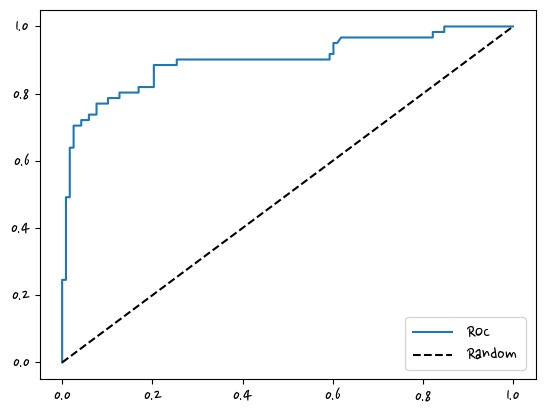

In [50]:
roc_curve_plot(y_test,pred_proba_1)

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_test,pred_proba_1)

0.8986524034454015

In [53]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba_1)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}, AUC:{auc:.4f}')